In [1]:
from general_tools.notebook.gpu_utils import setup_one_gpu
GPU = 2
setup_one_gpu(GPU)

Picking GPU 2


In [5]:
import numpy as np
import os.path as osp
import tensorflow as tf
import matplotlib.pyplot as plt
from general_tools.notebook.tf import reset_tf_graph
from general_tools.in_out.basics import create_dir
from geo_tool import Point_Cloud

from tf_lab.data_sets.shape_net import snc_category_to_synth_id
from tf_lab.iclr.helper import load_multiple_version_of_pcs

In [6]:
from tf_lab.gans.vanilla_gan import Vanilla_GAN
from tf_lab.gans.w_gan_gp import W_GAN_GP

from tf_lab.point_clouds.generators_discriminators import mlp_discriminator,\
point_cloud_generator, leaky_relu

In [7]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [8]:
save_model = False
do_training = True
plot_train_curve = True
max_epochs = 2000
save_syn_step = 100
save_synthetic_samples = np.hstack([np.array([1, 5, 10]), 
                                    np.arange(save_syn_step, max_epochs + 1, 
                                              save_syn_step)])
do_wgan = True

In [9]:
if do_wgan:
    gan_tag = 'r_w_gan'
else:
    gan_tag = 'r_gan'

In [10]:
class_name = 'car'
# = raw_input('Give me the class type.\n').lower()
syn_id = snc_category_to_synth_id()[class_name]
synthetic_data_out_dir = '/orions4-zfs/projects/optas/DATA/OUT/iclr/synthetic_samples_new/r_gan/'

In [11]:
n_pc_points = 2048
beta = 0.5

discriminator = mlp_discriminator
generator = point_cloud_generator
gen_kwargs = {'b_norm': [False]}

batch_size = 50
noise_params = {'mu':0, 'sigma': 0.2}
noise_dim = 128
init_lr = 0.0001


if do_wgan:
    arch_tag = 'mlp_pc_gen_default'
    disc_kwargs = {'b_norm': [False]}
else:    
    arch_tag = 'mlp_pc_gen_default_leak_20'
    leak = 0.2
    disc_kwargs = {'non_linearity': leaky_relu(leak), 'b_norm': [False]}


n_output = [n_pc_points, 3]
experiment_name = '_'.join([class_name, arch_tag, gan_tag, str(n_pc_points) + '_pts'])

In [12]:
in_data = load_multiple_version_of_pcs('uniform_one', syn_id, n_classes=1)
training_data = in_data['train']
n_syn_samples = training_data.num_examples  # Same number as original GT data.

751 pclouds were loaded. They belong in 1 shape-classes.
6372 pclouds were loaded. They belong in 1 shape-classes.
374 pclouds were loaded. They belong in 1 shape-classes.


In [13]:
reset_tf_graph()

if do_wgan:
    lam = 10
    gan = W_GAN_GP(experiment_name, init_lr, lam, n_output, noise_dim,
                    discriminator, generator,
                    disc_kwargs=disc_kwargs, beta=beta)
    
else:    
    gan = Vanilla_GAN(experiment_name, init_lr, n_output, noise_dim,
                 discriminator, generator, beta=beta, 
                 gen_kwargs=gen_kwargs, disc_kwargs=disc_kwargs)

accum_syn_data = []
train_stats = []

1 (0.5774706206321716, 0.2114582797139883) 24.8962380886


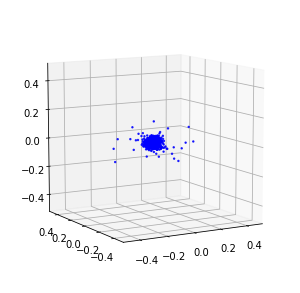

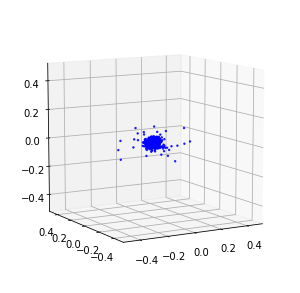

2 (-0.17929244410991668, 0.7266340970993042) 26.315967083
3 (-0.03428123694658279, 0.9214300286769866) 26.5111601353
4 (-0.04041292501986027, 0.9104412055015564) 25.4568638802
5 (-0.06349329218268394, 0.9600250315666199) 26.1165189743


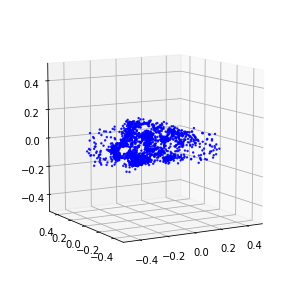

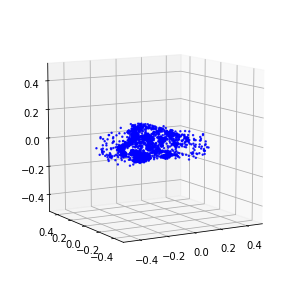

6 (-0.0933784552514553, 1.1826638197898864) 26.6451239586
7 (-0.12167719787359238, 1.4204280328750611) 27.7180998325
8 (-0.1290336202979088, 1.4985572481155396) 27.5666692257
9 (-0.1397687895298004, 1.5228693866729737) 28.4077501297
10 (-0.1374855996966362, 1.5726158761978148) 26.7373640537


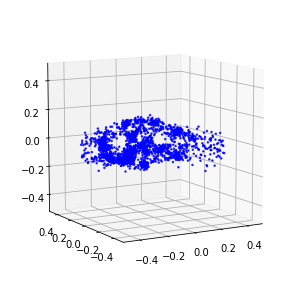

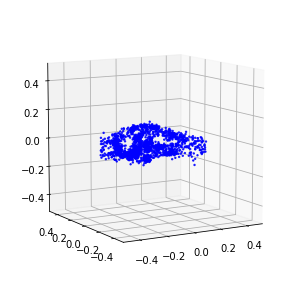

11 (-0.138178279876709, 1.588762788772583) 25.7755692005
12 (-0.13718199461698533, 1.5643100452423095) 26.1649141312
13 (-0.1362104189991951, 1.5697143363952637) 26.8183910847
14 (-0.14141943126916887, 1.538362717628479) 26.6023099422
15 (-0.1411677878499031, 1.562903232574463) 26.5590071678
16 (-0.1357655336856842, 1.5855643606185914) 26.1785128117
17 (-0.13761081254482269, 1.5342889070510863) 25.9663770199
18 (-0.1347133535146713, 1.4771817541122436) 31.6012561321
19 (-0.13204978221654892, 1.4205801963806153) 26.1816620827
20 (-0.12249838295578956, 1.4578614139556885) 26.8283951283
21 (-0.12059680408239365, 1.441870846748352) 26.2621221542
22 (-0.1120176169872284, 1.4410206174850464) 25.6833341122
23 (-0.10566887900233268, 1.367972207069397) 26.8385930061
24 (-0.10089843124151229, 1.3355010557174682) 32.5694179535
25 (-0.09337470653653145, 1.247867102622986) 26.0933668613
26 (-0.09103621450066567, 1.2202859926223755) 26.2170917988
27 (-0.08510489419102668, 1.2773497676849366) 27.1885

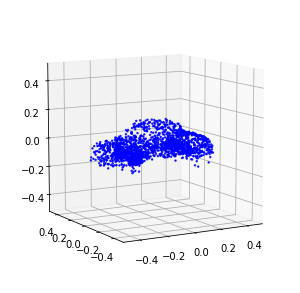

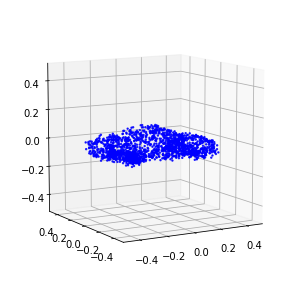

101 (-0.02830846307426691, 0.5675226247310639) 26.2221400738
102 (-0.03193501886725426, 0.5543124663829804) 26.3257269859
103 (-0.038184339702129366, 0.580029433965683) 26.4142520428
104 (-0.029186640083789826, 0.55578409075737) 26.5980060101
105 (-0.032683931834995746, 0.47997981786727906) 27.1693110466
106 (-0.029265086390078066, 0.5063285422325134) 28.0758450031
107 (-0.03497884351015091, 0.5141311490535736) 26.9254169464
108 (-0.03090505716204643, 0.5838591802120209) 25.5452888012
109 (-0.03300926786661148, 0.5687110805511475) 27.4951229095
110 (-0.02959214188158512, 0.590856751203537) 25.9384539127
111 (-0.02845897712558508, 0.5060797703266143) 25.7981190681
112 (-0.02883452780544758, 0.5554087245464325) 36.7604660988
113 (-0.028397879987955094, 0.5317229175567627) 25.3370928764
114 (-0.02804883919656277, 0.45208043217658994) 26.2542281151
115 (-0.027455823995172976, 0.46361625075340274) 27.2226188183
116 (-0.023457787558436395, 0.45481575846672057) 26.9840559959
117 (-0.023991925

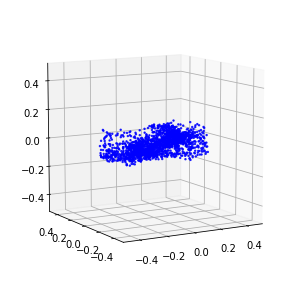

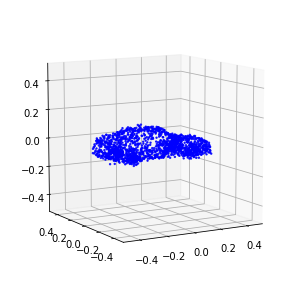

201 (-0.006271988324820996, 0.2471472591161728) 25.9615921974
202 (0.001612869791686535, 0.41092590175569055) 26.1281971931
203 (-0.0075077213309705255, 0.431683269739151) 27.5579581261
204 (0.00012415986135601997, 0.6668576848506927) 27.1788470745
205 (-0.00040138200670480727, 0.7108529400825501) 26.7809939384
206 (-0.0027983993254601957, 0.647768325805664) 26.2460839748
207 (-0.0009792077466845512, 0.7071016335487366) 26.1744148731
208 (-0.0007927200123667717, 0.7219855523109436) 26.2146229744
209 (-0.00065824269130826, 0.7209897756576538) 27.5210399628
210 (0.0009520422220230103, 0.6033261549472809) 27.8985290527
211 (-0.00177070614695549, 0.5266701793670654) 26.3629889488
212 (-0.0010384594947099686, 0.45717701196670535) 26.1773469448
213 (-0.0022020873203873635, 0.31812467707321046) 28.2197790146
214 (-0.005133860889822245, 0.5891438841819763) 28.1416780949
215 (-0.0005195555910468101, 0.3090576434135437) 26.1896679401
216 (-4.536132514476776e-05, 0.541810133755207) 27.7750079632


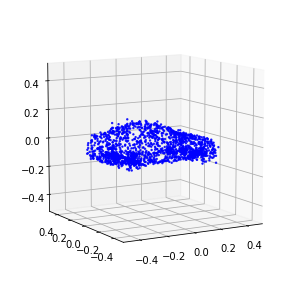

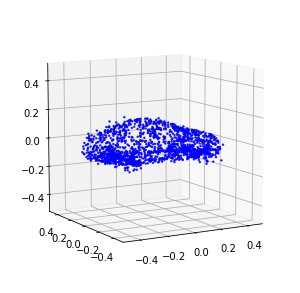

301 (0.004433067064732313, -0.3170502385497093) 25.9463529587
302 (0.009385795395821333, -0.40187630608677866) 26.4479560852
303 (0.009824703004211188, -0.264705255292356) 26.338891983
304 (0.004278230264782906, -0.19798314560204744) 26.4593219757
305 (-0.001699910819530487, -0.09133108174428343) 26.9656090736
306 (0.0020630760043859483, -0.014491545408964157) 26.3429620266
307 (0.004669652082026005, -0.12811704739928245) 26.3180291653
308 (0.004967376302927732, -0.17072885669767857) 26.256608963
309 (0.0058641831651329995, -0.1428111544623971) 26.3445129395
310 (0.008478233128786088, -0.21159625764936207) 26.339400053
311 (0.00623457058519125, -0.22408296673558653) 26.2492580414
312 (0.008383877716958523, 0.045062920302152636) 26.5462899208
313 (0.006417301747947931, -0.019927497059106826) 26.6866080761
314 (0.003077688701450825, -0.1706366863101721) 27.1319909096
315 (0.006583686489611864, -0.36704179406166076) 25.8225870132
316 (0.0043190490156412124, -0.36804727792739866) 26.618290

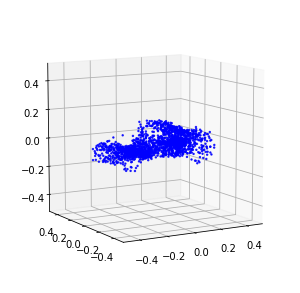

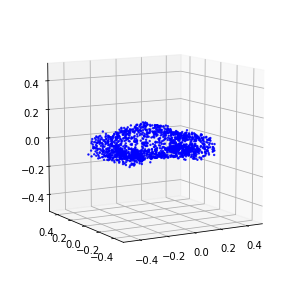

401 (0.0018623477444052697, -0.8095540928840638) 28.7658159733
402 (0.0019294411577284337, -0.6121551716327667) 26.2951960564
403 (0.005731861505657435, -0.3897448355145752) 26.0442671776
404 (0.0006975181773304939, -0.2416938564181328) 26.8213970661
405 (-0.0006950189620256424, 0.12065569557249546) 26.3437800407
406 (-1.1567946523427963e-05, -0.13990408945828675) 26.371598959
407 (0.004459022201597691, -0.19467562340199948) 28.1402819157
408 (0.003968494314700365, -0.17579062603414058) 26.4516441822
409 (-0.002559439316391945, -0.07241412997245789) 26.7030229568
410 (0.0029245850406587125, -0.19167853925377132) 26.1630160809
411 (0.003711737561970949, -0.0660356479138136) 26.126500845
412 (0.00422083019465208, -0.11751999162137508) 26.1806771755
413 (0.010383706022053957, -0.18945917934179307) 26.8889122009
414 (0.004581147119402886, -0.31519430220127104) 26.164137125
415 (0.010181310519576072, -0.2995926281809807) 25.962138176
416 (0.005775623507797718, -0.4046492839604616) 26.299665

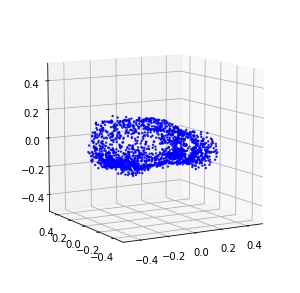

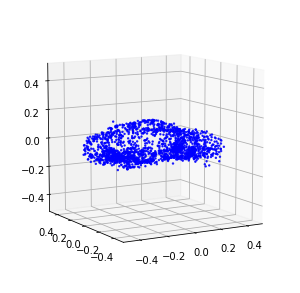

501 (0.006363658636808395, 0.6051500952243805) 27.5195920467
502 (0.018692676290869712, 0.6450479876995087) 26.6209590435
503 (0.00854677502810955, 0.19896365880966185) 36.9748959541
504 (0.013726449765264988, 0.31499134154990316) 25.5206720829
505 (0.02179442451149225, 0.9316003274917602) 25.9639098644
506 (0.012100272472947836, 0.11546123286243529) 32.6040680408
507 (0.009796358339488507, 0.4024577355384827) 26.7990159988
508 (0.007498304158449173, 0.0770857966132462) 26.20058918
509 (0.025644930206239223, 0.12385182350873947) 26.2013580799
510 (0.0078047184497117995, -0.2799925747513771) 28.3209598064
511 (0.0037644536197185517, -0.16449457682669164) 28.8745009899
512 (0.012718086786568165, 0.004539681449532509) 27.4702999592
513 (0.01129187858849764, 0.1751771070808172) 26.4295589924
514 (0.012515023991465568, 0.12008003771305084) 26.5732929707
515 (0.013490864865481853, -0.2849643748998642) 27.1496930122
516 (0.007520580552518368, -0.3001031805574894) 27.6329898834
517 (0.01209988

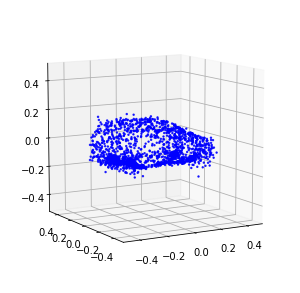

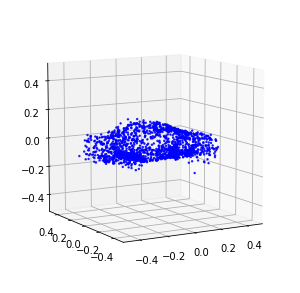

601 (0.0003558092974126339, -0.18711870893836022) 26.7048139572
602 (0.005474528897553683, -0.15804112128913403) 28.1087040901
603 (0.01766901506483555, -0.2263406854867935) 26.8436460495
604 (0.00015220113843679428, -0.2622299811244011) 25.8004159927
605 (0.003951120011508465, -0.33361645057797434) 31.2966899872
606 (0.005163094762712717, -0.607751942873001) 27.7749900818
607 (-0.0024639799669384957, -0.7334400355815888) 28.4485058784
608 (-0.0006347121484577656, -0.7779073131084442) 26.973831892
609 (0.008402625918388367, 0.05485097765922546) 27.1941759586
610 (0.0037919018976390363, 0.024504414051771162) 27.4448208809
611 (0.028933399077504873, 0.21242928337305783) 26.5073890686
612 (-0.009186733551323413, 0.5376699829101562) 28.4877710342
613 (0.009143682081252337, 0.7671744298934936) 27.1540908813
614 (0.0009793302491307259, 0.7202964901924134) 26.9077720642
615 (0.0016880155634135007, 0.5717931997776031) 26.9027569294
616 (0.005306344436481595, 0.481977344751358) 26.1774921417
61

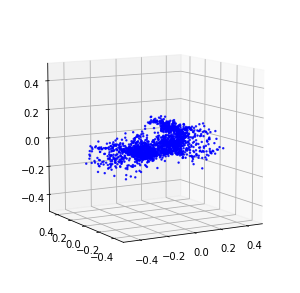

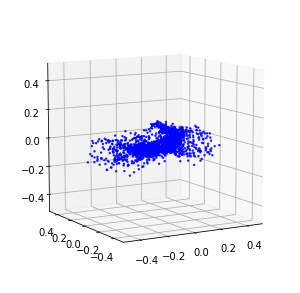

701 (-0.0024570716954767703, -0.08923355832695962) 25.6731319427
702 (0.013057011798024178, -0.16528166625648738) 26.8884170055
703 (0.0038110551983118056, -0.13232955490238965) 29.0537660122
704 (0.006779017060995102, 0.13451805638615041) 27.9956300259
705 (0.004199489705264568, 0.0021794834919273854) 26.216075182
706 (0.007149312999099493, -0.009459788240492343) 28.072537899
707 (0.008701113265007734, 0.07697441291296854) 28.1163561344
708 (0.00589781952649355, 0.13882798627018927) 25.9365229607
709 (0.014398014053702354, 0.21322949707508088) 26.6089258194
710 (0.016976361986249685, 0.29818110048770907) 26.8956899643
711 (-0.004669958565384149, 0.16322255754843354) 26.5305888653
712 (0.0016498711798340082, 0.06684478351846337) 28.1326019764
713 (0.004726042740046978, -0.06361038443632423) 26.1217739582
714 (-0.0005461736246943474, 0.11716474243905395) 27.0214369297
715 (0.009645370278507471, 0.29372360348701476) 26.243792057
716 (0.0015852244831621647, 0.5431693649291992) 25.76748704

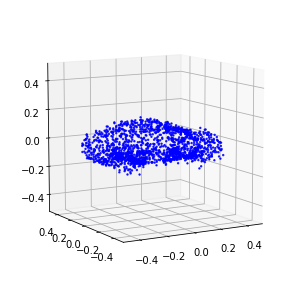

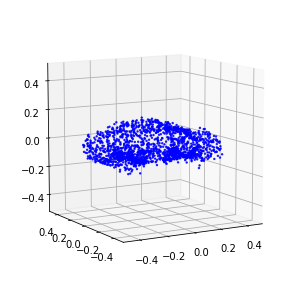

801 (-0.001261563828215003, -0.510473335981369) 31.8074419498
802 (0.0006753997327759862, -0.5397672420740127) 29.0563340187
803 (-0.00403095425106585, -0.8195753431320191) 29.980203867
804 (-0.005212562697939575, -0.6664074435830116) 29.2126319408
805 (-0.00553536896687001, -0.7097618651390075) 28.87490201
806 (-0.0013635993404313921, -0.9322406995296478) 26.604968071
807 (-0.0032333475183695553, -0.5421393311023712) 28.1252729893
808 (0.0016541799306869507, -0.6812383085489273) 29.2894411087
809 (-0.0037101881597191096, -0.5098520171642303) 29.0149087906
810 (-0.0024202529806643725, -0.8549267959594726) 28.8521227837
811 (-0.002373610524460673, -0.8480729579925537) 28.1019060612
812 (-0.0008542059855535626, -0.9299378776550293) 26.5884978771
813 (-0.002821013981476426, -0.5652050721645355) 26.2759771347
814 (-0.001762931921519339, -0.5484218990802765) 26.010725975
815 (-0.0019517608787864447, -0.5581772351264953) 25.9101860523
816 (-0.0013246866883710026, -0.6270484721660614) 30.8430

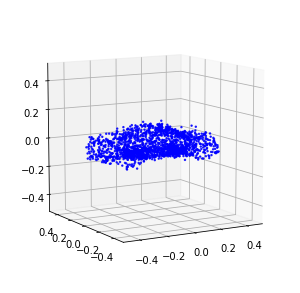

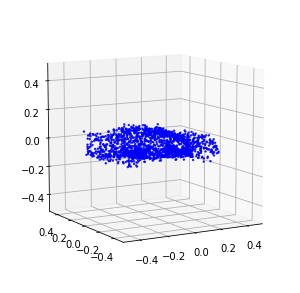

901 (-0.0036467157378792764, -0.35480676233768466) 29.2535171509
902 (-0.0030839086761698126, -0.3671620796620846) 29.562680006
903 (-0.0024418491404503582, -0.3021590819954872) 28.4824478626
904 (-0.0029064291571266948, -0.08961206555366516) 26.1702878475
905 (-0.002288359464146197, -0.1433639819920063) 26.6503009796
906 (-0.0013440656047314405, 0.07153512558201328) 26.0419199467
907 (-0.0028989168740808963, -0.11649849109351634) 26.2225151062
908 (0.004068544394336641, -0.387077713906765) 25.9752161503
909 (0.00014374359138309955, -0.405381498336792) 31.1439578533
910 (-0.0028454319005832077, -0.6617982339859009) 28.2748188972
911 (-0.002225578777492046, -0.5885494029521943) 26.8867218494
912 (-0.00426260010804981, -0.7360595035552978) 26.5385630131
913 (-0.0021740595987066627, -0.9419423294067383) 26.6514589787
914 (-0.0008463960997760296, -0.7025739502906799) 26.9296998978
915 (-0.002288625000976026, -0.5355560374259949) 26.2754790783
916 (-0.0032492335783317686, -0.305089558965992

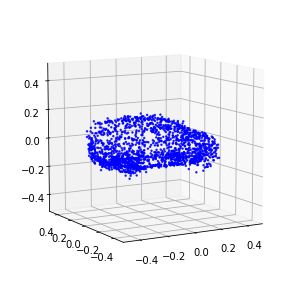

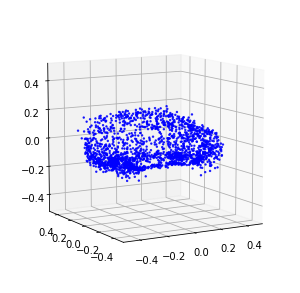

1001 (-0.0031216265168040993, 0.6902317333221436) 29.1228818893
1002 (-0.0038201105520129204, 0.17786616064608096) 26.6385700703
1003 (-0.005427976992912591, 0.01965581774711609) 29.3217051029
1004 (-0.002457971351221204, 0.44468165405094623) 26.6340680122
1005 (-0.004251477489247918, 0.13024336852598936) 26.3278751373
1006 (-0.002541775606572628, 0.1730316563695669) 26.5383250713
1007 (-0.002136229935102165, -0.27440852850675584) 30.0264010429
1008 (-0.0037828876529820265, 0.2637345179915428) 29.104683876
1009 (-0.0033012616727501154, -0.1640913401544094) 27.1180508137
1010 (-0.0023474660143256187, -0.4440342617034912) 29.1036920547
1011 (-0.004197128480300307, 0.15661533826729282) 30.2637879848
1012 (-0.0033089098166674377, 0.11858239341527224) 26.4177830219
1013 (-0.0024139762418344617, 0.20564432967454194) 27.9152798653
1014 (-0.002344759101048112, 0.12931779026985168) 26.3383169174
1015 (-0.0027045553913339973, 0.09119987349957227) 26.4346060753
1016 (-0.003502530806697905, 0.1214

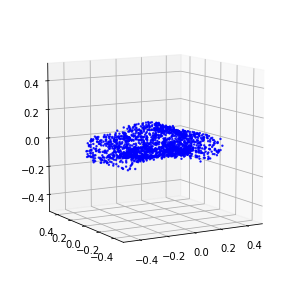

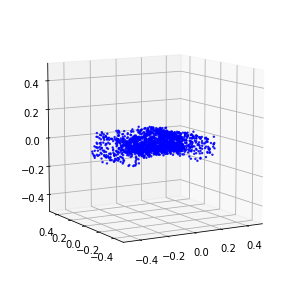

1101 (-0.004519402166828513, -0.7966629028320312) 27.4926800728
1102 (-0.0037463234961032867, -0.49146494150161746) 28.3435850143
1103 (-0.004659225566312671, -0.4578227698802948) 28.3089690208
1104 (-0.0052122128484770654, -0.2592516940832138) 26.0772430897
1105 (-0.004575471794232726, -0.14984819494187832) 26.5202720165
1106 (-0.002976976439356804, -0.16950180158019065) 26.216946125
1107 (-0.0040511886719614264, -0.4159396505355835) 32.7681069374
1108 (-0.003955793516710401, -0.5605617928504943) 27.6440639496
1109 (-0.005051740483380854, -0.6978650903701782) 27.35780406
1110 (-0.005055191148072481, -0.697786568403244) 26.9277601242
1111 (-0.005656190717592835, -0.709021064043045) 28.0714688301
1112 (-0.004130769800394773, -0.7157997345924377) 26.18435812
1113 (-0.006354299570433796, -0.9188160824775696) 26.7067041397
1114 (-0.005798774386756122, -0.8570847773551941) 26.8417599201
1115 (-0.006593048796057701, -0.726041579246521) 28.7943871021
1116 (-0.003867803149856627, -0.6231025302

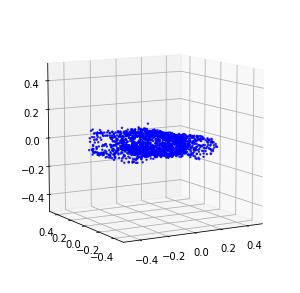

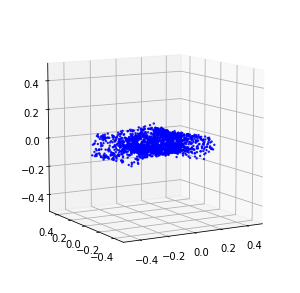

1201 (-0.0029850619100034235, -1.9028417158126831) 28.5755290985
1202 (-0.0029912628019228577, -1.8693936967849731) 29.4311699867
1203 (-0.0026415926199406387, -1.7394101572036744) 27.4789700508
1204 (-0.0019604828022420405, -2.056735939979553) 26.9294390678
1205 (-0.002926300223916769, -2.1064132690429687) 26.8534209728
1206 (0.009101122821681202, -1.813283953666687) 27.1744930744
1207 (-0.002490148276090622, -2.017369647026062) 25.6219730377
1208 (-0.0017020814279094338, -1.7618171548843384) 26.7141799927
1209 (-0.0024492342807352543, -1.7563038921356202) 26.1265201569
1210 (-0.0029311780938878654, -1.7267683696746827) 30.2071621418
1211 (-0.0029168143458664416, -1.5543579149246216) 29.6015150547
1212 (-0.003478366894647479, -1.9237021398544312) 28.0585620403
1213 (-0.004288212763145566, -1.9591672658920287) 28.649543047
1214 (-0.0017819594833999872, -1.875440664291382) 29.7909419537
1215 (-0.0025704335290938616, -1.7932759380340577) 27.1273710728
1216 (-0.0025147446328774095, -1.493

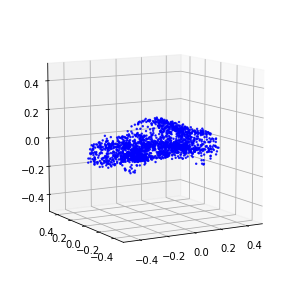

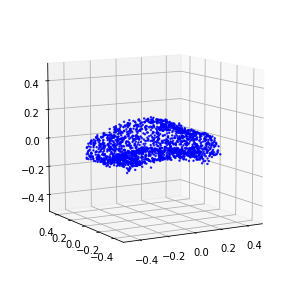

1301 (-0.003255814692005515, 0.7959017920494079) 25.9107701778
1302 (-0.004067192286252975, 0.7121554756164551) 26.0562949181
1303 (0.02807157920859754, 0.10990628145635128) 30.3638050556
1304 (-0.0014995706249028445, -0.25653743028640746) 28.701914072
1305 (0.0003136492632329464, -0.35167267560958865) 31.7132148743
1306 (-0.0016838704943656921, -0.3415184432268143) 26.1108779907
1307 (0.0002639504326507449, -0.509295716881752) 27.1457970142
1308 (-0.0037178264874964955, -0.5526948213577271) 28.5087580681
1309 (-0.0022231138898059725, -0.42308597922325136) 29.5318639278
1310 (-0.0017251556315459311, -0.1893552017211914) 27.3846738338
1311 (-0.00188490529358387, -0.09540114790201187) 26.6169719696
1312 (-0.0015954254381358624, -0.10739665084984154) 30.4900388718
1313 (-0.0041170941106975075, -0.09864567467942834) 27.6569261551
1314 (-0.0036932624205946924, -0.0977283576130867) 27.4989049435
1315 (-0.0031859456710517406, 0.03258429059525952) 27.3738999367
1316 (-0.00220970281586051, 0.01

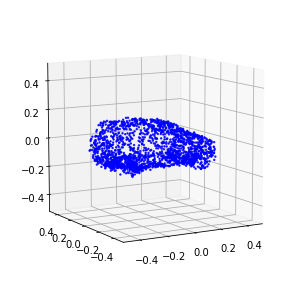

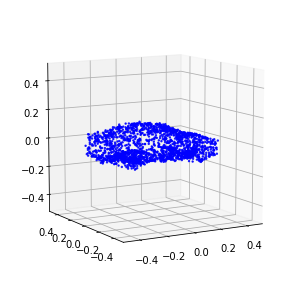

1401 (-0.0031031726310029625, -0.7139543223381043) 25.8569681644
1402 (-0.0018088296274654566, -0.631897644996643) 26.8682758808
1403 (-0.0024860404934734107, -1.2808932495117187) 26.6226320267
1404 (-0.001523277359083295, -1.2569276475906372) 29.2437040806
1405 (-0.003058003849349916, -1.033681435585022) 29.8061280251
1406 (-0.0018361013112589716, -0.6802259588241577) 28.3934159279
1407 (-0.0022793321125209333, -0.45665753960609434) 34.3006119728
1408 (-0.002977342592086643, -0.5890421533584594) 26.5267901421
1409 (-0.00342878520488739, 0.3055280064046383) 27.3588449955
1410 (-0.005942847777158022, 0.35325595557689665) 30.3994657993
1411 (-0.001652070480864495, -0.14278734266757964) 29.4923131466
1412 (-0.0011986128287389875, -0.5048328018188477) 27.604516983
1413 (-0.0024458844773471355, -0.2883517283201218) 28.8522260189
1414 (-0.004079947993159294, -0.5236831736564637) 27.9323959351
1415 (-0.003036075232550502, -0.6923323047161102) 26.7898819447
1416 (-0.0031124583380296826, -0.807

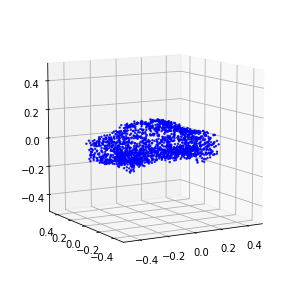

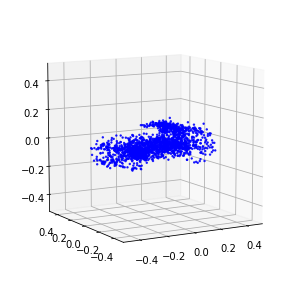

1501 (-0.0032490246221423148, 0.4514756202697754) 27.4197468758
1502 (-0.0022739012222737073, 0.40306164979934694) 26.9686498642
1503 (-0.0029880463853478433, 0.45205079317092894) 27.5027601719
1504 (-0.0037235822826623918, 0.4078631782531738) 27.3981659412
1505 (-0.005481989878229797, 0.36081199526786806) 37.1061460972
1506 (-0.005397524428553879, 0.7477559757232666) 29.2164280415
1507 (-0.004753044644370675, 0.42018956065177915) 30.0662760735
1508 (-0.0054440580159425735, 0.3613022321462631) 28.602353096
1509 (-0.0054576024636626246, 0.38336908876895903) 29.1093380451
1510 (-0.0038379876874387263, 0.28987874269485475) 27.0982341766
1511 (-0.005281823860481381, 0.3749998068809509) 29.4293990135
1512 (-0.0037353774048388003, 0.6071717977523804) 26.273763895
1513 (-0.002825556643307209, 0.2676618283987045) 27.4957139492
1514 (-0.0045830812435597185, 0.6159066784381867) 28.2589359283
1515 (-0.005856597110629082, 0.8837860226631165) 28.8522279263
1516 (-0.003353218637406826, 1.00783740758

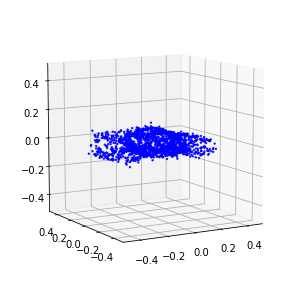

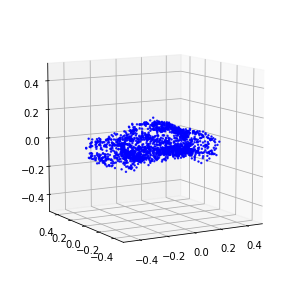

1601 (0.007047129366546869, -0.4285266637802124) 28.85501194
1602 (0.01848029202967882, -0.07615149054676294) 27.3023459911
1603 (-0.004987968858331442, -0.05085370235145092) 26.8158380985
1604 (0.008752476893365384, -0.15410495609045027) 26.9281089306
1605 (0.003522267524152994, 0.010088061839342117) 28.8764529228
1606 (0.004263562403619289, -0.15937303528189659) 28.299270153
1607 (0.002924124527722597, -0.1334884667955339) 28.0880739689
1608 (0.0004490419030189514, -0.47066670536994937) 27.4660029411
1609 (0.007108498811721802, -0.7409336566925049) 27.1603829861
1610 (0.0035684113577008248, -1.0398580932617187) 27.8501260281
1611 (-0.0063605946823954585, -0.5589789754152298) 27.6266429424
1612 (0.0028206357657909395, -0.2844472360610962) 29.5230660439
1613 (0.0110839015096426, -0.49704721093177795) 28.719894886
1614 (0.007504121027886867, -0.4781786668300629) 28.5413680077
1615 (0.008442212030291557, -0.8086834406852722) 26.5989072323
1616 (0.0063053412735462186, -0.9056477737426758)

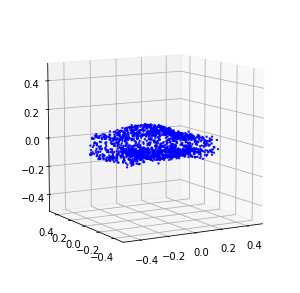

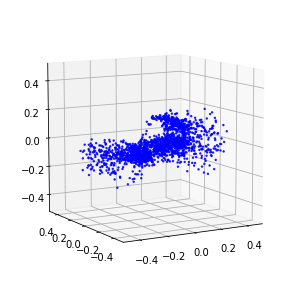

1701 (0.0021413959227502347, -0.6258633697032928) 25.7313530445
1702 (0.0018720507081598043, -0.9504343223571777) 27.0731709003
1703 (0.007168686229735613, -0.8153058695793152) 29.335050106
1704 (-0.006507322495803237, -0.9454227876663208) 28.3222091198
1705 (0.0023735483940690756, -0.7795892119407654) 26.8730859756
1706 (0.005839035220444202, -0.772972047328949) 26.0553221703
1707 (-0.0010994628239423038, -1.0651540780067443) 28.868489027
1708 (-0.0009327355958521366, -1.228464183807373) 26.9689130783
1709 (0.0038607813585549594, -1.3594716215133666) 26.5837419033
1710 (0.0011262095533311367, -1.4431892681121825) 27.0292150974
1711 (0.010174808662384748, -1.3308027791976929) 30.1873700619
1712 (0.007245790671557188, -1.4716132164001465) 29.4666280746
1713 (0.011446816936135293, -1.1980868434906007) 26.1293489933
1714 (0.02225539019703865, -0.7832383489608765) 29.8141410351
1715 (0.008769717931747436, -0.9436696362495423) 26.2293038368
1716 (0.008660646177828312, -0.6375120544433593) 2

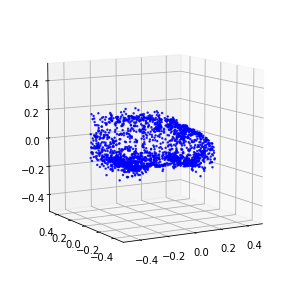

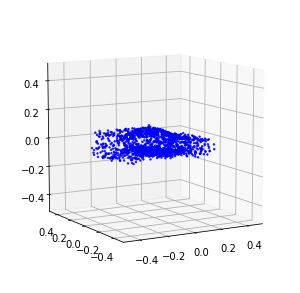

1801 (0.012571513455361128, -0.6578358006477356) 32.1019630432
1802 (-0.008409244235605002, -0.6284537744522095) 26.3884599209
1803 (-0.0017719819080084561, -0.6902042019367218) 29.3586759567
1804 (0.014654052840545774, -0.4368490548431873) 30.165542841
1805 (-0.007506176797673106, -0.2559845334291458) 29.8585400581
1806 (0.0041568464413285254, -0.32643321573734285) 35.5697660446
1807 (-0.01245641290768981, -0.3805248332023621) 26.6149260998
1808 (0.00038147761672735215, -0.2782776165008545) 27.0438559055
1809 (0.01154743966087699, -0.045208244919776916) 26.258783102
1810 (0.0015942117422819138, -0.3271946504712105) 26.3052101135
1811 (0.0029358877800405025, -0.6356345856189728) 26.6852490902
1812 (0.006334575857967139, -0.40974857926368713) 42.0497570038
1813 (0.0023115422017872334, -0.41814732253551484) 27.4416189194
1814 (0.004838163811713457, -0.6297577488422393) 27.3057079315
1815 (0.006278385763987899, -0.8390962553024292) 26.1976530552
1816 (-0.005006980316713453, -1.04805947065

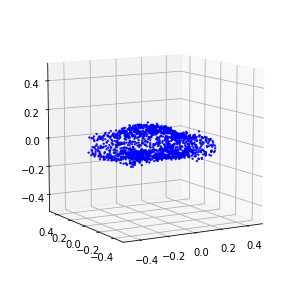

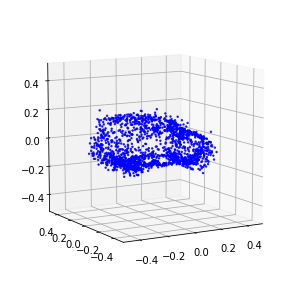

1901 (0.0075222403295338155, -1.2932413005828858) 30.3570189476
1902 (0.002876736655831337, -1.7244872951507568) 30.1068499088
1903 (0.00492981031909585, -1.488466329574585) 26.3660130501
1904 (-0.0031798837408423424, -1.6116732501983642) 26.4585978985
1905 (0.007569112621247769, -1.600968370437622) 26.3889269829
1906 (0.0021898575238883497, -1.4178990936279297) 28.566190958
1907 (0.00814102679118514, -1.5915029239654541) 30.3523900509
1908 (0.010818402625620366, -1.3790493488311768) 29.2112019062
1909 (-0.006108561966568232, -1.2237768268585205) 29.0643410683
1910 (0.004087965238839388, -1.2194436550140382) 26.5735340118
1911 (0.007331771628931165, -0.9084547066688538) 27.0399048328
1912 (0.01031626801006496, -0.6585602414608002) 31.5594081879
1913 (-0.004189923949539661, -0.9380553030967712) 30.2959229946
1914 (-0.005808041730895638, -1.2163107204437256) 31.7265930176
1915 (0.007035245856270194, -1.175328025817871) 32.4246439934
1916 (-0.0010883412919938564, -1.192410054206848) 29.74

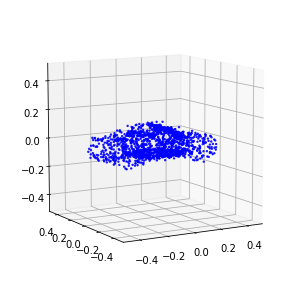

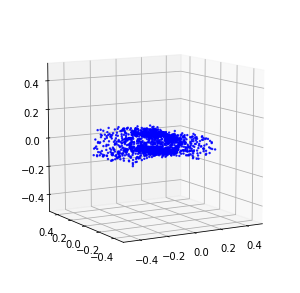

In [14]:
save_syn_data_dir = create_dir(osp.join(synthetic_data_out_dir, experiment_name))

if do_training:
    for _ in range(max_epochs):
        loss, duration = gan._single_epoch_train(training_data, batch_size, noise_params)
        epoch = int(gan.sess.run(gan.increment_epoch))            
        print epoch, loss, duration
        
        if save_model and epoch % 10 == 0:
            checkpoint_path = osp.join(train_dir, model_saver_id)
            gan.saver.save(gan.sess, checkpoint_path, global_step=epoch)
            
        if epoch in save_synthetic_samples:
            syn_data = gan.generate(n_syn_samples, noise_params)
            accum_syn_data.append(syn_data)
            np.savez(osp.join(save_syn_data_dir, 'epoch_' + str(epoch)), syn_data)
            for k in range(2):
                Point_Cloud(syn_data[k]).plot()
        train_stats.append((epoch,) + loss)

In [17]:
train_stats

[(1, 0.5774706206321716, 0.2114582797139883),
 (2, -0.17929244410991668, 0.7266340970993042),
 (3, -0.03428123694658279, 0.9214300286769866),
 (4, -0.04041292501986027, 0.9104412055015564),
 (5, -0.06349329218268394, 0.9600250315666199),
 (6, -0.0933784552514553, 1.1826638197898864),
 (7, -0.12167719787359238, 1.4204280328750611),
 (8, -0.1290336202979088, 1.4985572481155396),
 (9, -0.1397687895298004, 1.5228693866729737),
 (10, -0.1374855996966362, 1.5726158761978148),
 (11, -0.138178279876709, 1.588762788772583),
 (12, -0.13718199461698533, 1.5643100452423095),
 (13, -0.1362104189991951, 1.5697143363952637),
 (14, -0.14141943126916887, 1.538362717628479),
 (15, -0.1411677878499031, 1.562903232574463),
 (16, -0.1357655336856842, 1.5855643606185914),
 (17, -0.13761081254482269, 1.5342889070510863),
 (18, -0.1347133535146713, 1.4771817541122436),
 (19, -0.13204978221654892, 1.4205801963806153),
 (20, -0.12249838295578956, 1.4578614139556885),
 (21, -0.12059680408239365, 1.44187084674835

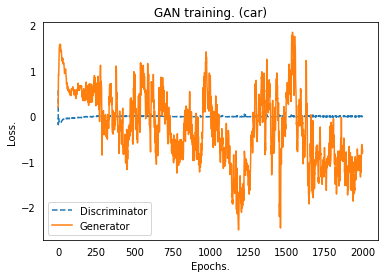

In [16]:
if plot_train_curve:
    x = range(len(train_stats))
    d_loss = [t[1] for t in train_stats]
    g_loss = [t[2] for t in train_stats]
    plt.plot(x, d_loss, '--')
    plt.plot(x, g_loss)
    plt.title('GAN training. (%s)' %(class_name))
    plt.legend(['Discriminator', 'Generator'], loc=0)
    
    plt.tick_params(axis='x', which='both', bottom='off', top='off')
    plt.tick_params(axis='y', which='both', left='off', right='off')
    
    plt.xlabel('Epochs.') 
    plt.ylabel('Loss.')